# Business case :

## Importing the basic libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.decomposition import   PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1004-Fifa20.zip

--2023-06-06 08:46:10--  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1004-Fifa20.zip
Resolving d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)... 13.227.211.74, 13.227.211.117, 13.227.211.127, ...
Connecting to d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)|13.227.211.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2562564 (2.4M) [application/x-zip-compressed]
Saving to: ‘PRCP-1004-Fifa20.zip’

PRCP-1004-Fifa20.zi 100%[===================>]   2.44M  2.20MB/s    in 1.1s    

2023-06-06 08:46:11 (2.20 MB/s) - ‘PRCP-1004-Fifa20.zip’ saved [2562564/2562564]



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/PRCP-1004-Fifa20.zip')
zip_ref.extractall()

In [ ]:
df=pd.read_csv('/content/Data/players_20.csv',na_filter=['+#'])

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Basic checks

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
df.shape

(18278, 104)

In [ ]:
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


## Numerical summary

In [ ]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## Categorical summary

In [ ]:
df.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


## Data preprocessing

In [ ]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
null_df=pd.DataFrame()
null_df['per']=df.isnull().sum()/len(df)*100
null_df['count']=df.isnull().sum()

In [ ]:
list(null_df[null_df['per']>50].index)

['player_tags',
 'loaned_from',
 'nation_position',
 'nation_jersey_number',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits']

In [ ]:
df.drop(list(null_df[null_df['per']>50].index), axis=1, inplace=True)

In [ ]:
df.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [ ]:
df.drop(['sofifa_id', 'player_url', 'long_name'], axis=1, inplace=True)

In [ ]:
df.shape

(18278, 90)

In [ ]:
cols=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 
      'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [ ]:
for i in cols:
    df[i]=df[i].str.split('+', expand=True)[0]

In [ ]:
def get_rows_with_nulls_above_threshold(df, threshold=50):
    rows_with_nulls=[]
    total_columns=len(df.columns)
    
    for index, row in df.iterrows():
        null_count=row.isnull().sum()
        null_percentage=(null_count/total_columns)*100
        
        if null_percentage>threshold:
            rows_with_nulls.append(row)
            
    return pd.DataFrame(rows_with_nulls)

## Categorical and numerical columns segregation

In [ ]:
cat_cols=[] # empty list for categorical columns
num_cols=[] # empty list for numerical columns

for i in df.columns:
    if df[i].dtype=='object': # condition to check whether it is object or any other type
        cat_cols.append(i)
    else:  # otherwise it will append to numerical columns
        num_cols.append(i)
print('categorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', num_cols, end=' ')

categorical columns are:- 
 ['short_name', 'dob', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position', 'joined', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'] 

numerical columns are:- 
 ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',

In [ ]:
print(len(cat_cols))

cat_data=df[cat_cols]
cat_data.head(2)

37


,short_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,team_position,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,RW,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,LW,...,65,61,61,61,65,61,53,53,53,61


In [ ]:
print(len(num_cols))

num_data=df[num_cols]
num_data.head(2)

53


,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11


In [ ]:
a=get_rows_with_nulls_above_threshold(cat_data)

In [ ]:
a.index

Int64Index([    3,     6,    13,    14,    25,    28,    30,    31,    32,
               53,
            ...
            18220, 18223, 18225, 18228, 18229, 18231, 18239, 18251, 18259,
            18272],
           dtype='int64', length=2036)

In [ ]:
df.drop(a.index, axis=0, inplace=True)

In [ ]:
df.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65,61,61,61,65,61,53,53,53,61


In [ ]:
b=get_rows_with_nulls_above_threshold(num_data)

In [ ]:
b.index

Index([], dtype='object')

In [ ]:
df.drop(b.index, axis=0, inplace=True)

In [ ]:
df.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65,61,61,61,65,61,53,53,53,61


In [ ]:
dates=['dob', 'joined']

for i in dates:
    df[i]=pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   short_name                  16242 non-null  object        
 1   age                         16242 non-null  int64         
 2   dob                         16242 non-null  datetime64[ns]
 3   height_cm                   16242 non-null  int64         
 4   weight_kg                   16242 non-null  int64         
 5   nationality                 16242 non-null  object        
 6   club                        16242 non-null  object        
 7   overall                     16242 non-null  int64         
 8   potential                   16242 non-null  int64         
 9   value_eur                   16242 non-null  int64         
 10  wage_eur                    16242 non-null  int64         
 11  player_positions            16242 non-null  object    

In [ ]:
for i in cols:
    df[i]=df[i].astype(int)

In [ ]:
cat_cols=[] # empty list for categorical columns
num_cols=[] # empty list for numerical columns

for i in df.columns:
    if df[i].dtype=='object': # condition to check whether it is object or any other datatype
        cat_cols.append(i)
    else: # otherwise it will apend to numerical columns
        num_cols.append(i)
print('categorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', num_cols, end=' ')       

categorical columns are:- 
 ['short_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position'] 

numerical columns are:- 
 ['age', 'dob', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',

In [ ]:
len(cat_cols)

9

In [ ]:
len(num_cols)

81

## Exploratory Data Analysis(EDA)

### Univariate analysis

In [ ]:
# !pip install sweetviz

In [ ]:
import sweetviz
sv=sweetviz.analyze(df)
sv.show_html('univariant.html')

## insight1

        # Observations:

        1.AGE:
        The range of player age between 16 to 42 with the average of 25.3

        2.HEIGHT CM:
        The average height of player is 181.4cm, maximum height is 205 and minimum height is 156cm.

        3.WEIGHT KG:
        The range of weight of player between 50 to 110kg.

        4.OVERALL:
        The maximum score of stats is 94 and minimum is 48.0 with the average of 66.2

        5.POTENTIAL:
        The maximum score of player potential is 95.0 and minimum score of potential is 49.0

        6.VALUE EUR:
        The average value of player is 2.5million.
        Maximum value of player is 105.5 million.

        7.WAGE EUR:
        The maximum living wage of player is 565k with the average of 9k.

        8.PREFEERED FOOT:
        75% of player prefered right foot.
        25% of player prefered left foot.

        9.INTERNATIONAL REPUTATION:
        The range of international reputation is 1 to 5.
        92% of player rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.

        10.WEAK FOOT:
        A week foot is rated between 1 to 5.
        Most of week foot player rating is 3

        11.SKILL MOVES:
        The skill moves range between 1 to 5.
        2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.

        12.WORK RATE:
        The maximum 54% count of work rate is medium then 18% is high/medium.

        13.BODY TYPE:
        59% player body type is normal
        36% player body type is lean.

        14.REAL FACE:
        89% player face is not real and remaining 11% face is real in game.

        15. RELEASE CLAUSE EUR:
        The maximum release clasue of player is 165.8million with the average of 4.7 million

        16. PLAYER TAGS:
        Strength, acrobat, engine, and speedster this tags is most in player tags

        17.TEAM POSITION & NATION POSITION:
        The maximum 7280 is SUB, 2958 is RES team posistion
        remaining all position is less than 5%

        18.TEAM JERSEY NUMBER:
        The range of team jersey number is 1 to 99.
        Maximum team jersey number between 1 to 40.

        19.CONTRACT VALID UNTIL:
        Most of the player contract valid until 2020, 23% player contract valid until 2021
        The range of contract year between 2019 to 2026.

        20.NATION JERSEY NUMBER:
        The range of nation jersey number between 1 to 30.
        Most of the jersey no between 1 to 20.

        21.PACE:
        The most of the pace of player between 60 to 80.

        22.SHOOTING:
        The range of shooting score between 15 to 93, Most number of shooting score around 25 to 70

        23.PASSING:
        The range of passing score of the player is 24 to 92 with the average 57.2.

        24. DRIBBLING:
        The most no of dribbling score between 50 to 80.

        25.DEFENDING:
        The range of defending between 15 to 90.the Most no of defending score between 50 to 70.

        26.PHYSIC:
        The physic score range between 27.0 to 90.0 the most no of physcore between 60 to 80

        27.GK DIVING:
        Most no of score of gk diving between 60 to 70
        The range of gk diving between 44 to 90.

        28. GK HANDLING:
        The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42

        29.GK KICKING:
        The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.

        30.GK REFLEX:
        Most of the gk reflex between 60 to 70.

        31.GK SPPED:
        The highest speed of of gk is 65.0, most no of gk speed between 25 to 50

        32. GK POSITIONING:
        Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41

        33. ATTACKING CROSSING:
        The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70

        34.ATTACKING FINISHING:
        Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.

        35.ATTACKING HEADING ACCURACY:
        Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60

        36.ATTACKING SHORT PASSING:
        most observation of attacking short passing between 60 to 70

        37.ATTACKING VOLLEYS:
        most observation of attacking volleys between 30 to 70 with the average of 42.8.

        38.SKILL DRIBBLING:
        most observation of skill dribbling is 65.
        The range of skill dribbling between 4 to 97

        39.SKILL CURVE:
        The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6

        40.SKILL FK ACCURACY:
        The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7

        41.SKILL LONG PASSING:
        The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8

        42.SKILL BALL CONTROL:
        The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5

        43.MOVEMENT ACCELERATION:
        The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12

        44.MOVEMENT SPRINT SPPED:
        Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4

        45.MOVEMENT AGILITY:
        Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5

        46.MOVEMENT REACTION:
        Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8

        47.MOVEMENT BALANCE:
        The range of movement balance is 12 to 97 with 64.9 average.

        48.POWER SHOT POWER:
        Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2

        49.POWER JUMPING:
        Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9

        50.POWER STAMINA:
        Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9

        51.POWER STRENGTH:
        Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2

        51.POWER LONG SHOT:
        Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8

        52.MENTALITY AGGRESSION:
        Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7

        53.MENTALITY INTERCEPTIONS:
        Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3

        54.MENTALITY POSITIONING:
        Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1

        55.MENTALITY VISION:
        Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6

        56.MENTALITY PENALTIES:
        Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7

        58.MENTALITY COMPOSER:
        Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5

        59.DEFENDING MARKING:
        Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8

        60.DEFENDING STANDING TACKLE:
        Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6

        61.DEFENDING SLIDING TACKLE:
        Maximum defending sliding tackle is 90 and minimum defending sliding tackle is 3 with the average of 45.6

        62.GOALKEEPING DIVING:
        Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6

        63.GOALKEEPING HANDLING:
        Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4

        63.GOALKEEPING KICKING:
        Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2

        63.GOALKEEPING POSITIONING:
        Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4

        63.GOALKEEPING REFLEX:
        Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7

        64.PLAYER POSITIONS
        [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
        This all position scores are almost same as well as most of the observation range between 56 to 63.

Text(0.5, 1.0, ' top 10 countries with most players')

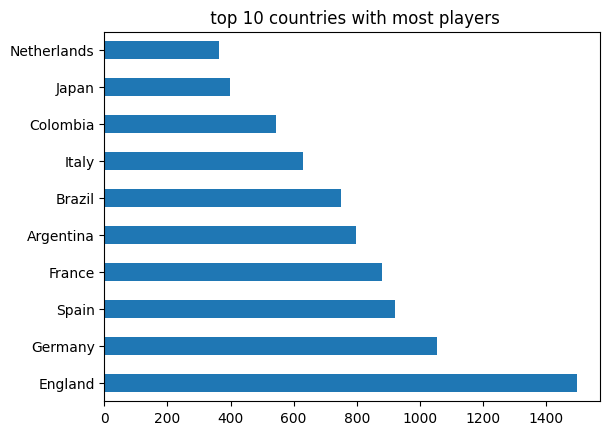

In [ ]:
df['nationality'].value_counts()[:10].plot(kind='barh')
plt.title(' top 10 countries with most players')

## insight2



---



---


it is found that `England` is the top team with most of fifa players being produced

---



### Bivariate analysis

<Axes: xlabel='potential', ylabel='value_eur'>

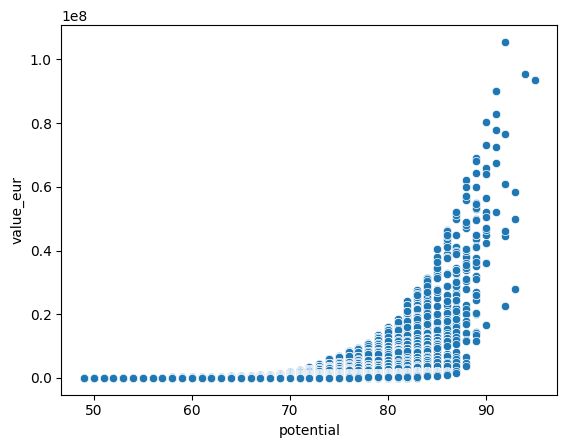

In [ ]:
sns.scatterplot(x='potential', y='value_eur', data=df)



---


*  as `potential` of player is increasing the `value` of that person is increasing



---



<Axes: xlabel='age', ylabel='overall'>

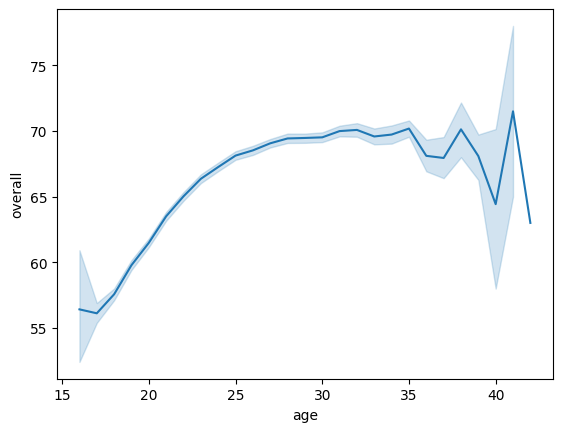

In [ ]:
sns.lineplot(x='age', y='overall', data=df)

## insight3



---

*  the `overall rating` of the person is less at the early ages of the person and it is gradually increasing until the `age` 35 years.

* after `35 years` of age the `overall rating` of the person is decreasing



---






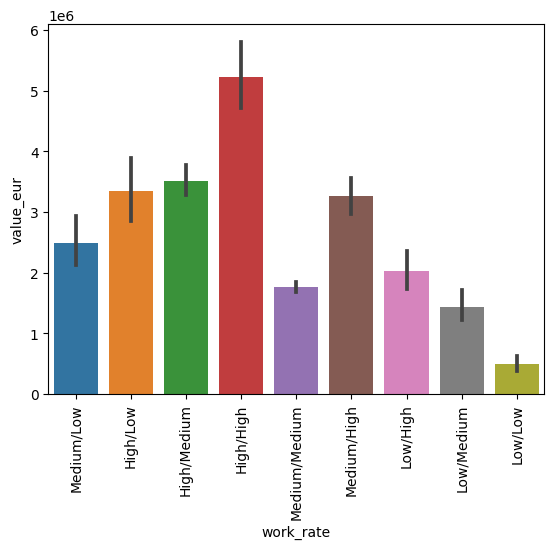

In [ ]:
sns.barplot(x='work_rate', y='value_eur', data=df)
plt.xticks(rotation=90)
plt.show()

## insight4

--------------------------------------------
*  persons with `high workrat`e are getting `more paid` than others
--------------------------------------------

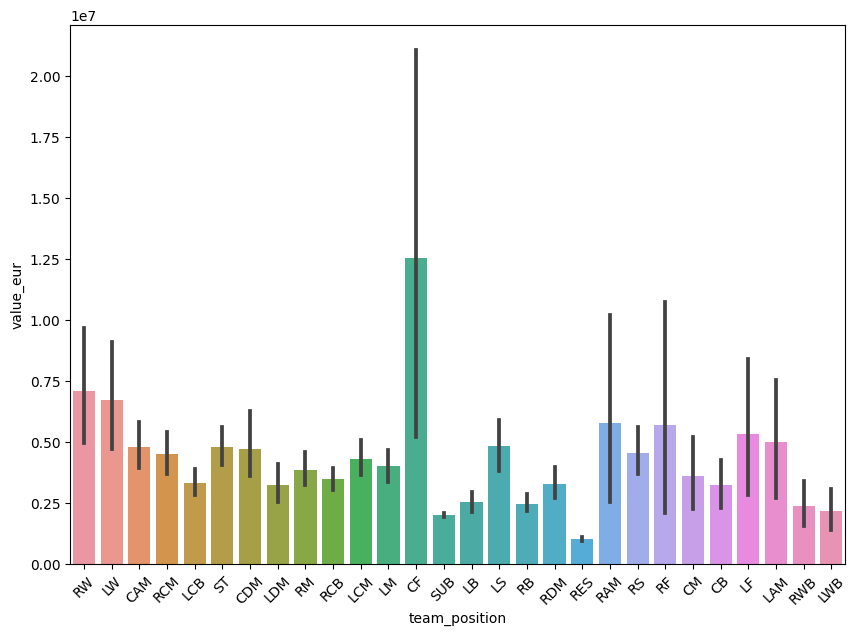

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x='team_position', y='value_eur', data=df)
plt.xticks(rotation=45)
plt.show()

## insight 5

---
*  there are `28 positions` in the game as per the data 
*  `center forward` player is getting `more paid` compared any other player
---

<Axes: xlabel='joined', ylabel='contract_valid_until'>

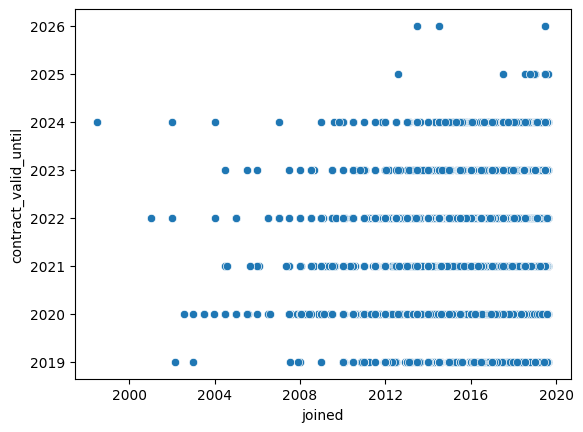

In [ ]:
sns.scatterplot(x='joined', y='contract_valid_until', data=df)

## insight 6

---
*  players who `joined recently` are having the `higher contract length`
---

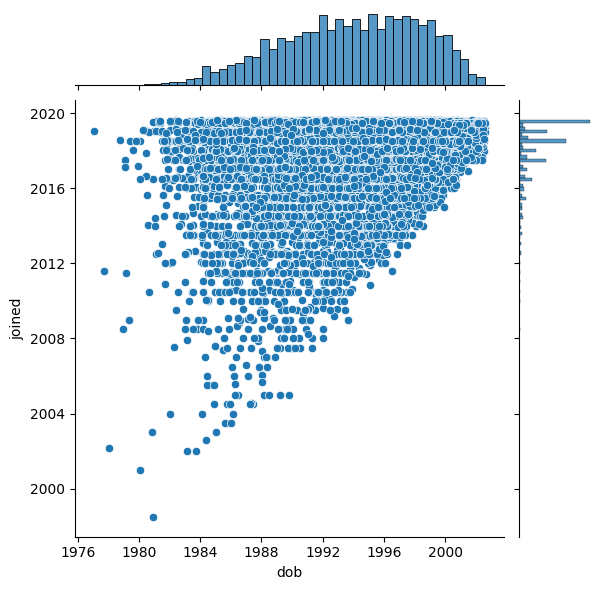

In [ ]:
sns.jointplot(x='dob', y='joined', data=df)

## insight 7

---
*  as the years passed the `gap is decreasing` between the `joining date` and the `dob `
*  the above graph is a clear indication that the people born in 2000 joined faster compared to the people born in 1996 and 1996 people joined thier club faster compared to 1992 people
---

In [ ]:
discrete_cols=[]
for i in cat_cols:
    if len(cat_data[i].unique())<=30:
        discrete_cols.append(i)

In [ ]:
discrete_cols

['preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position']

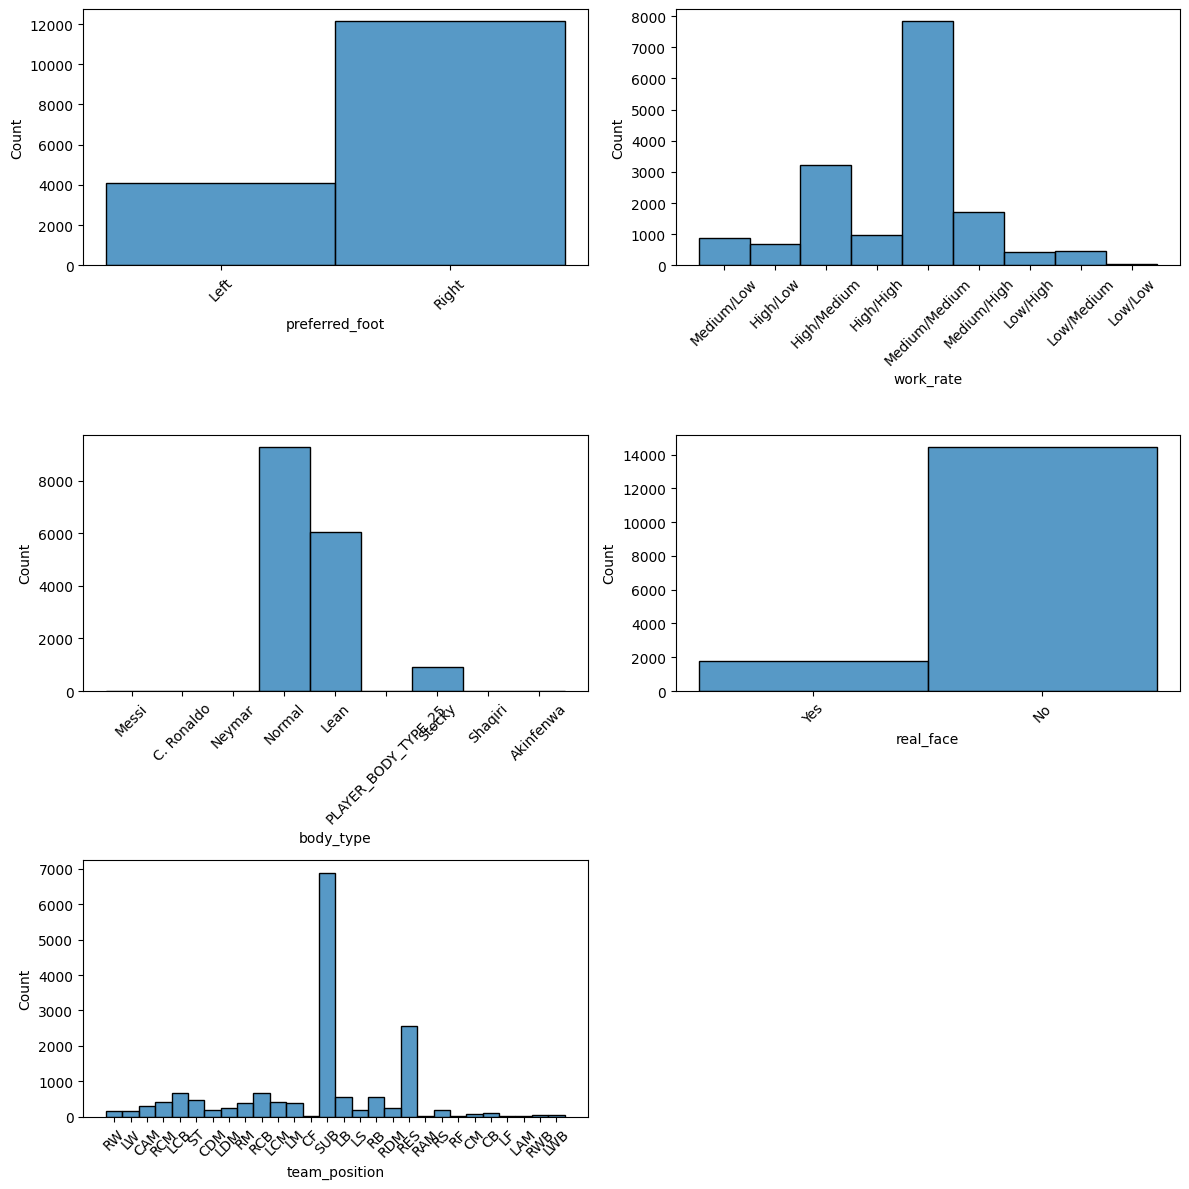

In [ ]:
plt_no=1
plt.figure(figsize=(12, 12))
for i in discrete_cols:
    plt.subplot(3, 2, plt_no)
    sns.histplot(df[i])
    plt_no+=1
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## insight 8

---
above subplot indicates

* `right footed` player are `more` compared to the `left footed` player
* there are `more players` with `medium workrate` compared rest `work_rate`
---

## checking for the categorical columns with negligable information

In [ ]:
negligable_cols=[]
for i in cat_cols:
    if len(df[i].value_counts())>30:
        negligable_cols.append(i)
        print(i, len(df[i].value_counts()))

short_name 15481
nationality 161
club 696
player_positions 642


In [ ]:
negligable_cols

['short_name', 'nationality', 'club', 'player_positions']

In [ ]:
X=df.drop(negligable_cols, axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
X.head(2)

,age,dob,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,1987-06-24,170,72,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,1985-02-05,187,83,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61


In [ ]:
X.drop(['dob','real_face','team_jersey_number','joined','contract_valid_until'],axis=1,inplace=True)

In [ ]:
X.head(2)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61


## Converting categorical data in to numerical data

### Label Encoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
for i in X.columns:
    if X[i].dtype=='object':
        X[i]=encoder.fit_transform(X[i])

In [ ]:
X.head(2)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,94,95500000,565000,0,5,4,4,7,3,195800000.0,24,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,93,58500000,405000,1,5,4,5,1,1,96500000.0,13,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61


## Handling missing values

In [ ]:
X.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
body_type                        0
release_clause_eur            1165
team_position                    0
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy   

In [ ]:
X.loc[X['release_clause_eur'].isnull()==True, 'release_clause_eur']=X['release_clause_eur'].median()

In [ ]:
X.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
release_clause_eur            0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement


### after checking outlier state of all the columns its found that these columns having more number of outliers

In [ ]:
outlier_cols=['value_eur','wage_eur','release_clause_eur','goalkeeping_diving',
              'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']

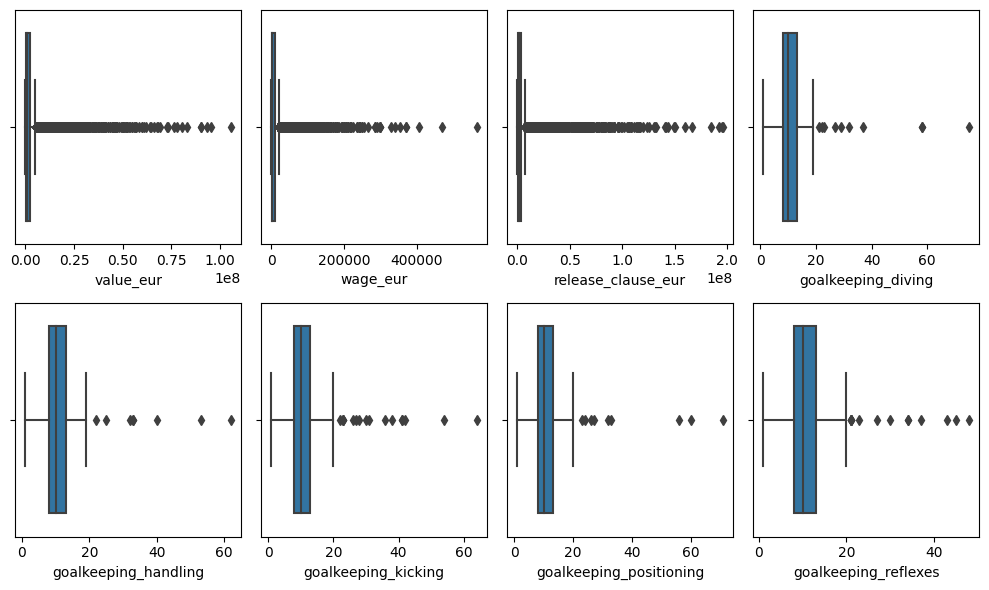

In [ ]:
pl_no=1
plt.figure(figsize=(10,6))
for i in outlier_cols:
  plt.subplot(2,4,pl_no)
  sns.boxplot(x=i,data=X)
  plt.xlabel=i
  pl_no+=1
plt.tight_layout()

In [ ]:
for i in outlier_cols:
 
  Q1=X[i].quantile(0.25)
  Q3=X[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR

  print(f'lower limit of {i} ------> {lower_lim}')
  print(f'upper limit of {i} ------> {upper_lim}')
  print('===================================')


lower limit of value_eur ------> -2575000.0
upper limit of value_eur ------> 5225000.0
lower limit of wage_eur ------> -11000.0
upper limit of wage_eur ------> 21000.0
lower limit of release_clause_eur ------> -3630000.0
upper limit of release_clause_eur ------> 7778000.0
lower limit of goalkeeping_diving ------> 0.5
upper limit of goalkeeping_diving ------> 20.5
lower limit of goalkeeping_handling ------> 0.5
upper limit of goalkeeping_handling ------> 20.5
lower limit of goalkeeping_kicking ------> 0.5
upper limit of goalkeeping_kicking ------> 20.5
lower limit of goalkeeping_positioning ------> 0.5
upper limit of goalkeeping_positioning ------> 20.5
lower limit of goalkeeping_reflexes ------> 0.5
upper limit of goalkeeping_reflexes ------> 20.5


In [ ]:
X.head(2)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,94,95500000,565000,0,5,4,4,7,3,195800000.0,24,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,93,58500000,405000,1,5,4,5,1,1,96500000.0,13,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61


In [ ]:
#calculating the number of lost rows if we use upper and lower limits

for i in outlier_cols:
 
  Q1=X[i].quantile(0.25)
  Q3=X[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  out_data=X.loc[(X[i]>lower_lim) & (X[i]<upper_lim)]
  print(f'no of rows lost in {i} ------> {len(X)-len(out_data)}')

no of rows lost in value_eur ------> 2146
no of rows lost in wage_eur ------> 1966
no of rows lost in release_clause_eur ------> 2463
no of rows lost in goalkeeping_diving ------> 10
no of rows lost in goalkeeping_handling ------> 8
no of rows lost in goalkeeping_kicking ------> 16
no of rows lost in goalkeeping_positioning ------> 9
no of rows lost in goalkeeping_reflexes ------> 14


### creating a function for eliminating the outlier using IQR method

In [ ]:
def remove_outliers(x):
  indexs=[]
  for i in x:
    Q1=X[i].quantile(0.25)
    Q3=X[i].quantile(0.75)
    IQR=Q3-Q1
    lower_lim=Q1-1.5*IQR
    upper_lim=Q3+1.5*IQR
    value=X.loc[(X[i]>upper_lim)].index
    indexs.append(value) 

  lst=[]
  for i in indexs:
    lst.extend(list(i)) 

  return set(lst)

In [ ]:
outlier_index=remove_outliers(outlier_cols)

In [ ]:
X.shape

(16242, 81)

In [ ]:
X.drop(outlier_index,axis=0,inplace=True)

In [ ]:
X.shape

(13336, 81)

## insight 9

---
* eliminated the extreme outliers from the data 
* 2906 rows were lost in the process of eliminating the outliers
---

## Scaling

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.423077,0.446809,0.416667,1.000000,0.846154,0.00,0.000000,1.0,0.000000,0.75,0.666667,0.875,0.625,0.166884,1.000000,0.802817,0.924242,1.000000,0.983333,0.384615,0.709677,0.864865,0.853333,0.658228,1.000000,0.891892,1.000000,0.986842,0.839506,0.984375,0.918033,0.906667,0.704225,0.833333,0.980769,0.720000,0.894737,0.557143,0.772727,0.649351,0.858974,0.619048,0.394737,0.932432,1.000000,0.857143,0.900000,0.400000,0.347222,0.323944,0.611111,0.611111,0.631579,0.736842,0.631579,0.94,0.94,0.94,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.673469,0.666667,0.666667,0.666667,0.673469,0.591837,0.500000,0.500000,0.500000,0.591837
1,0.576923,0.319149,0.216667,0.970588,0.820513,0.00,0.000000,0.0,0.000000,1.00,0.666667,1.000,0.250,0.166884,1.000000,0.816901,0.848485,0.929825,1.000000,0.169231,0.387097,0.837838,0.826667,0.405063,0.933333,0.770270,0.985075,0.592105,0.802469,0.953125,0.950820,0.880000,0.746479,0.916667,0.942308,0.880000,0.697368,0.271429,0.575758,0.363636,0.820513,0.369048,0.276316,0.959459,0.957746,0.818182,0.833333,0.280000,0.041667,0.183099,0.444444,0.333333,0.368421,0.684211,0.473684,0.84,0.84,0.84,0.981818,0.962963,0.962963,0.962963,0.981818,0.981481,0.981481,0.981481,0.981132,0.913043,0.913043,0.913043,0.981132,0.551020,0.490196,0.490196,0.490196,0.551020,0.428571,0.250000,0.250000,0.250000,0.428571
2,0.423077,0.680851,0.550000,0.970588,0.820513,0.00,0.000000,1.0,0.000000,0.50,0.333333,0.125,0.625,0.166884,1.000000,0.788732,1.000000,0.631579,0.800000,0.292308,0.774194,0.608108,0.960000,0.898734,0.750000,0.932432,0.865672,0.631579,0.703704,0.437500,0.803279,0.786667,0.788732,0.444444,1.000000,0.440000,0.921053,0.842857,0.409091,0.870130,0.884615,0.654762,0.289474,0.945946,0.647887,0.857143,0.866667,0.240000,0.236111,0.197183,0.388889,0.555556,1.000000,0.947368,1.000000,1.00,1.00,1.00,0.872727,0.925926,0.925926,0.925926,0.872727,0.814815,0.814815,0.814815,0.811321,0.695652,0.695652,0.695652,0.811321,0.469388,0.450980,0.450980,0.450980,0.469388,0.428571,0.480769,0.480769,0.480769,0.428571
3,0.538462,0.680851,0.566667,0.970588,0.820513,0.00,0.000000,1.0,0.333333,0.75,0.666667,0.250,1.000,0.166884,1.000000,0.788732,0.969697,0.561404,0.850000,0.215385,0.854839,0.500000,0.973333,0.936709,0.766667,0.878378,0.880597,0.552632,0.518519,0.328125,0.852459,0.773333,0.788732,0.680556,0.807692,0.346667,0.947368,0.600000,0.590909,0.922078,0.756410,0.738095,0.302632,0.959459,0.577465,0.662338,0.800000,0.106667,0.180556,0.042254,0.666667,0.666667,0.315789,0.210526,0.684211,1.00,1.00,1.00,0.854545,0.907407,0.907407,0.907407,0.854545,0.796296,0.796296,0.796296,0.792453,0.652174,0.652174,0.652174,0.792453,0.408163,0.411765,0.411765,0.411765,0.408163,0.367347,0.423077,0.423077,0.423077,0.367347
4,0.730769,0.382979,0.383333,0.941176,0.794872,0.94,0.619048,1.0,1.000000,0.50,0.000000,0.375,0.625,0.947930,0.071429,0.591549,0.560606,0.842105,0.750000,0.984615,0.774194,0.770270,0.426667,0.683544,0.933333,0.554054,0.6

In [ ]:
correlation_matrix=X_scaled.corr()

### elimination of highly corelated columns

 *  columns which having more than 0.9 correlation value are being eliminated 

In [ ]:
threshold=0.9

# Identify and eliminate highly correlated columns
columns_to_drop=[]
n_cols=len(correlation_matrix.columns)
for i in range(n_cols):
    for j in range(i+1, n_cols):
        if abs(correlation_matrix.iloc[i, j])>threshold:
            col_i=correlation_matrix.columns[i]
            col_j=correlation_matrix.columns[j]
            # Check if any of the columns is not already marked to be dropped
            if col_i not in columns_to_drop:
                columns_to_drop.append(col_j)

In [ ]:
len(columns_to_drop)

41

In [ ]:
X_scaled.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
X_scaled.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,lwb
0,0.423077,0.446809,0.416667,1.000000,0.846154,0.00,0.000000,1.0,0.000000,0.75,0.666667,0.875,0.625,1.000000,0.802817,0.924242,1.000000,0.983333,0.384615,0.709677,0.864865,0.658228,1.000000,0.891892,0.986842,0.839506,0.984375,0.833333,0.980769,0.720000,0.894737,0.557143,0.772727,0.649351,0.619048,0.932432,1.000000,0.857143,0.900000,0.611111,0.611111,0.631579,0.736842,0.631579,0.673469
1,0.576923,0.319149,0.216667,0.970588,0.820513,0.00,0.000000,0.0,0.000000,1.00,0.666667,1.000,0.250,1.000000,0.816901,0.848485,0.929825,1.000000,0.169231,0.387097,0.837838,0.405063,0.933333,0.770270,0.592105,0.802469,0.953125,0.916667,0.942308,0.880000,0.697368,0.271429,0.575758,0.363636,0.369048,0.959459,0.957746,0.818182,0.833333,0.444444,0.333333,0.368421,0.684211,0.473684,0.551020
2,0.423077,0.680851,0.550000,0.970588,0.820513,0.00,0.000000,1.0,0.000000,0.50,0.333333,0.125,0.625,1.000000,0.788732,1.000000,0.631579,0.800000,0.292308,0.774194,0.608108,0.898734,0.750000,0.932432,0.631579,0.703704,0.437500,0.444444,1.000000,0.440000,0.921053,0.842857,0.409091,0.870130,0.654762,0.945946,0.647887,0.857143,0.866667,0.388889,0.555556,1.000000,0.947368,1.000000,0.469388
3,0.538462,0.680851,0.566667,0.970588,0.820513,0.00,0.000000,1.0,0.333333,0.75,0.666667,0.250,1.000,1.000000,0.788732,0.969697,0.561404,0.850000,0.215385,0.854839,0.500000,0.936709,0.766667,0.878378,0.552632,0.518519,0.328125,0.680556,0.807692,0.346667,0.947368,0.600000,0.590909,0.922078,0.738095,0.959459,0.577465,0.662338,0.800000,0.666667,0.666667,0.315789,0.210526,0.684211,0.408163
4,0.730769,0.382979,0.383333,0.941176,0.794872,0.94,0.619048,1.0,1.000000,0.50,0.000000,0.375,0.625,0.071429,0.591549,0.560606,0.842105,0.750000,0.984615,0.774194,0.770270,0.683544,0.933333,0.554054,0.684211,0.493827,0.937500,0.680556,0.903846,0.773333,0.815789,0.800000,0.696970,0.649351,0.916667,0.540541,0.788732,0.636364,0.900000,0.277778,0.500000,0.368421,0.210526,0.210526,0.918367


In [ ]:
X_scaled.shape

(13336, 45)

## Feature selection

<Axes: >

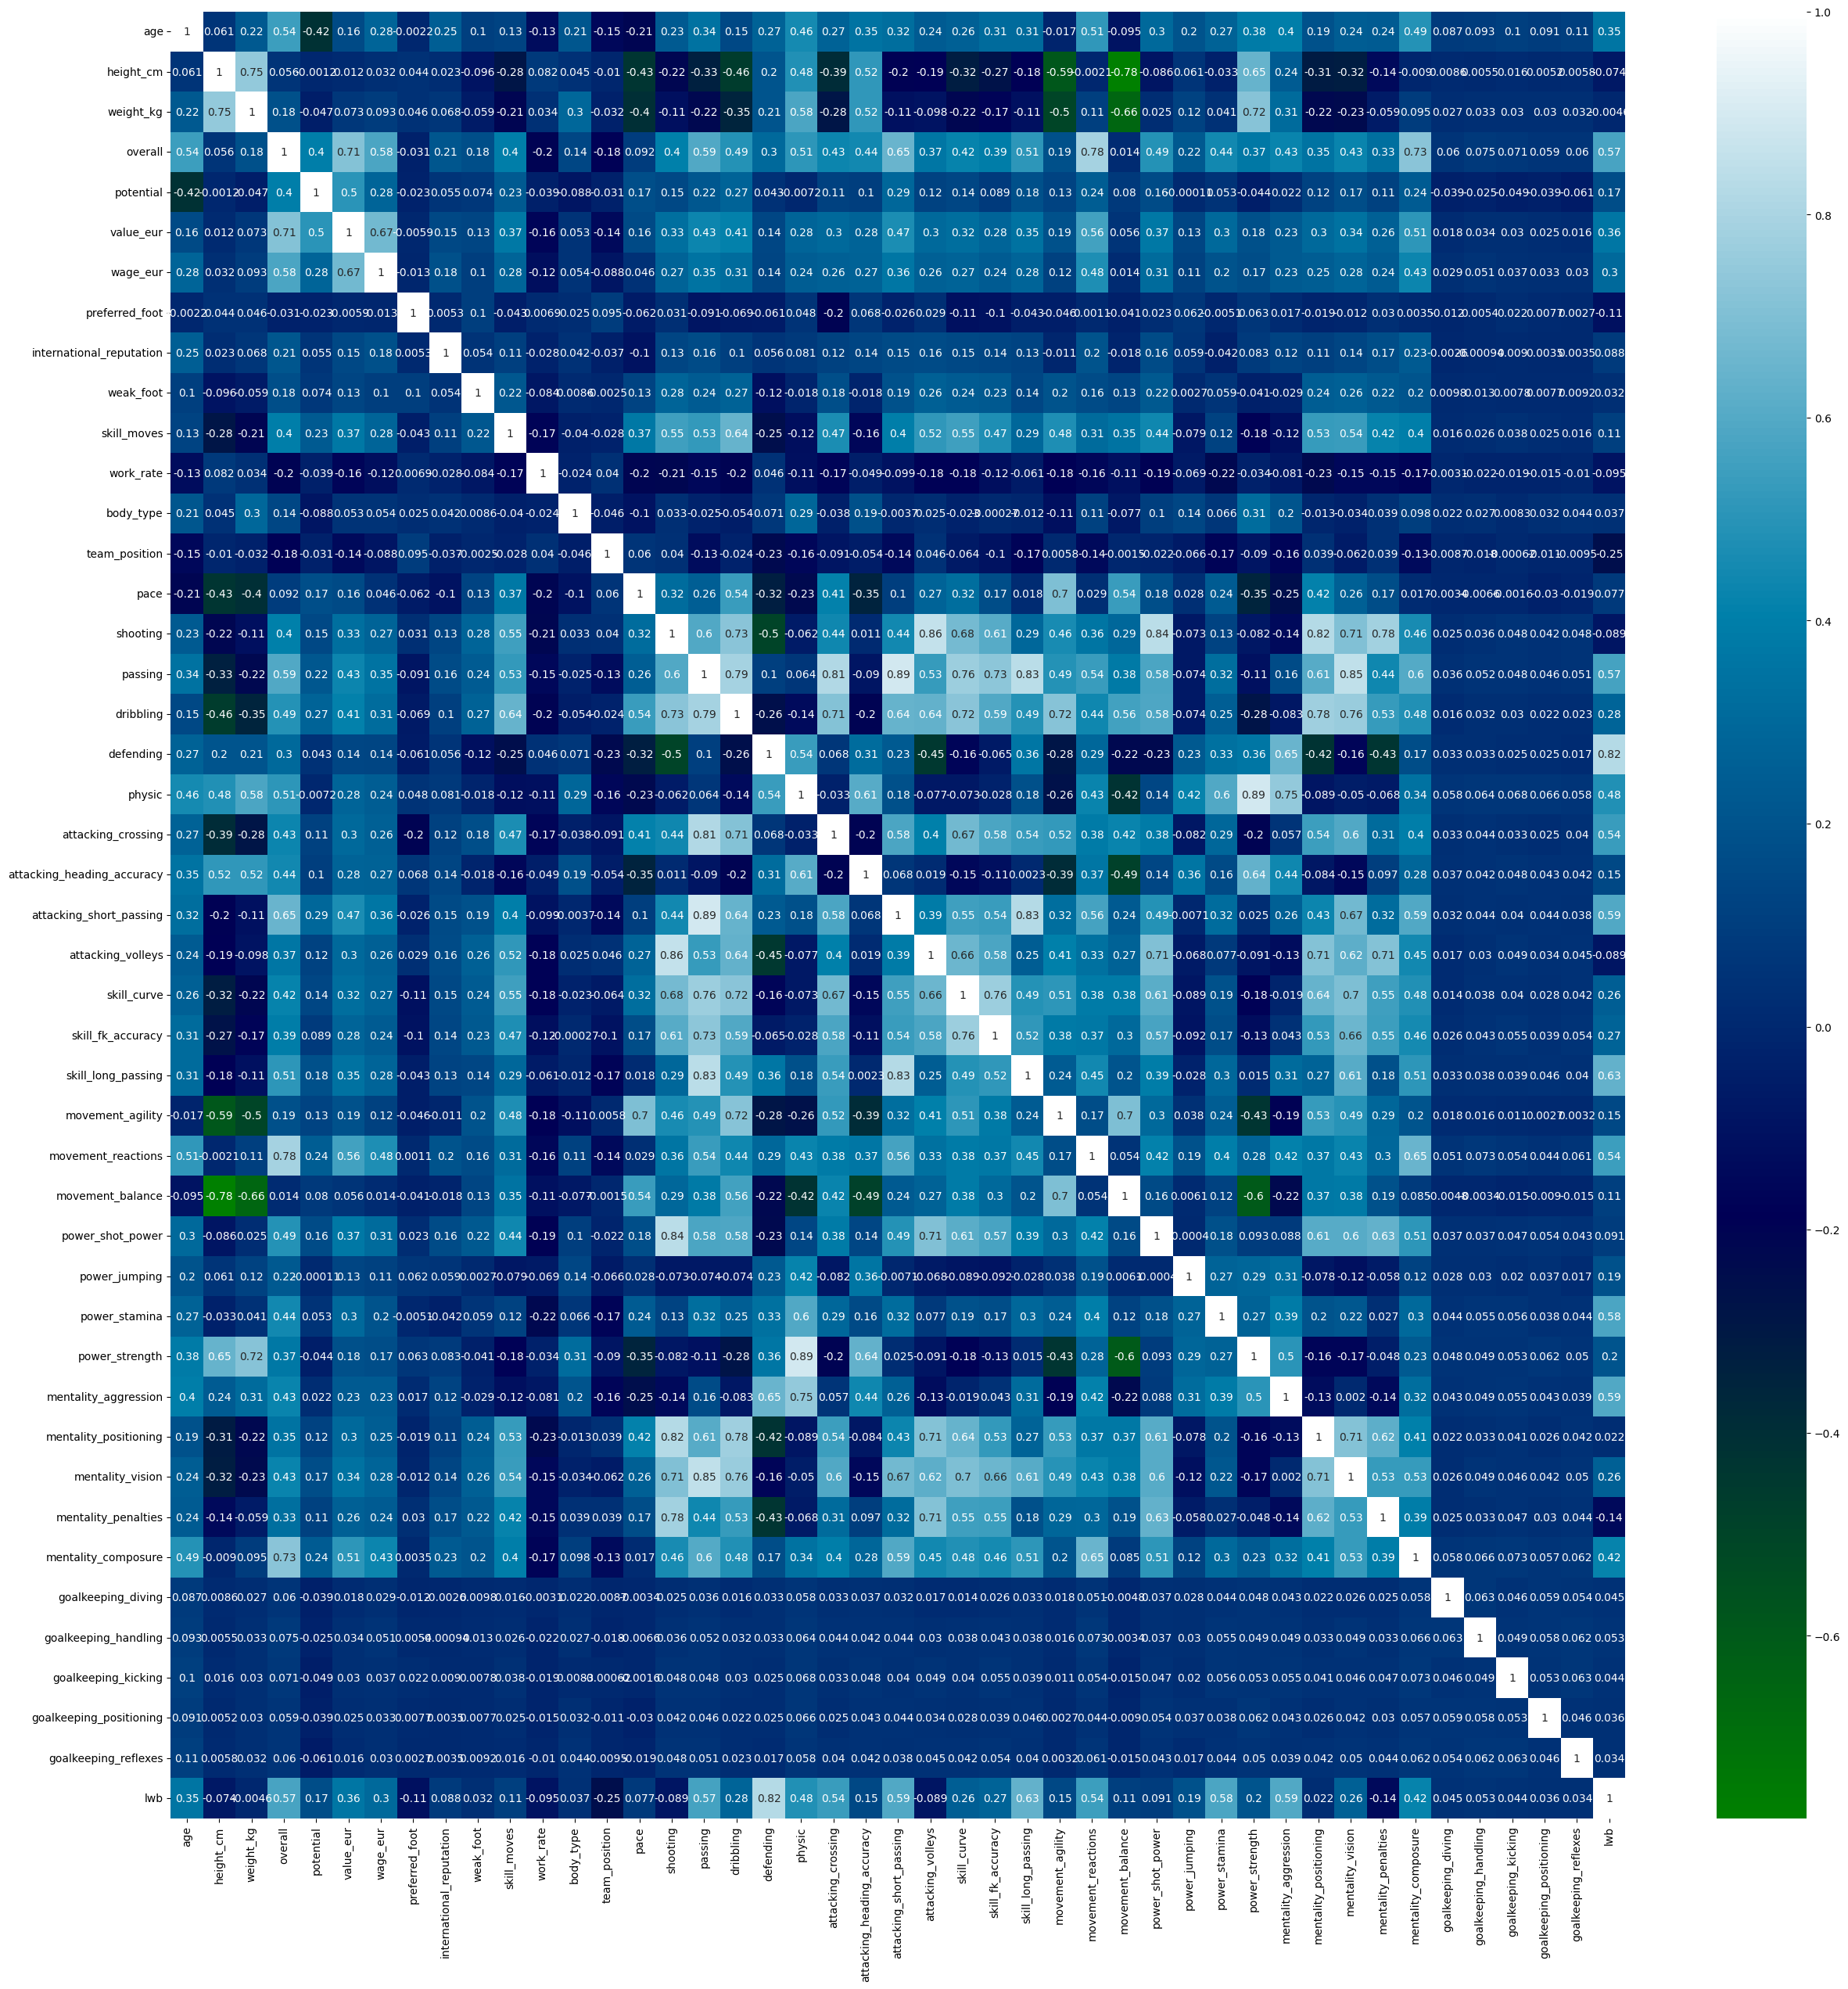

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(X_scaled.corr(), annot=True, cmap='ocean')

# PCA
* Using pca to reduce the number of columns

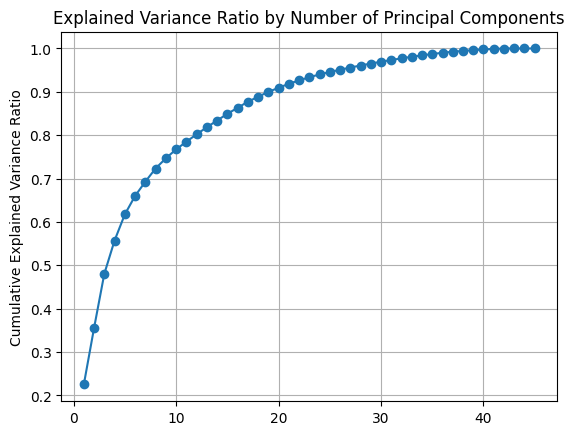

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance) + 1),cumulative_variance, marker='o')
# plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

---
* it is clear that the top 20 componets of PCA are representing 90% data variability ...so selecting only 20 components
---

In [ ]:
# Step:2 Select the components
pca = PCA(n_components=20)
fifa = pca.fit_transform(X_scaled)

In [ ]:
fifa

array([[-1.54675804, -0.16847847, -0.38776039, ...,  0.33191018,
        -0.20761896,  0.16142814],
       [-1.38068666, -0.46284921,  0.78494034, ...,  0.07943139,
        -0.53691579,  0.27441323],
       [-0.92428668, -0.04263768, -0.55689044, ...,  0.36516396,
        -0.14683013,  0.21063761],
       ...,
       [ 0.97970892, -0.38188894, -0.05283378, ...,  0.0258436 ,
         0.03716986, -0.17600022],
       [ 0.87336891, -0.38449259, -0.05381455, ...,  0.06502166,
         0.133688  , -0.21765798],
       [ 0.92225427, -0.27540908, -0.07913254, ..., -0.0557063 ,
         0.03066346, -0.33503246]])

In [ ]:
cols=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9',
      'pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20']
# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=cols)
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,-1.546758,-0.168478,-0.387760,-0.513295,0.224344,-0.278265,-0.275630,-0.027391,-0.097142,0.066363,-0.335655,-0.045012,0.153676,0.135589,0.047677,-0.051585,0.289758,0.331910,-0.207619,0.161428
1,-1.380687,-0.462849,0.784940,-0.546772,0.094451,-0.260697,-0.044026,0.159627,-0.053251,0.149687,0.094043,0.112893,-0.015937,0.183959,0.132938,0.191832,0.506977,0.079431,-0.536916,0.274413
2,-0.924287,-0.042638,-0.556890,0.510237,0.820129,-0.114965,-0.140058,0.040326,-0.270806,-0.074135,-0.082260,-0.185190,0.626818,0.177149,0.175309,-0.351038,0.161316,0.365164,-0.146830,0.210638
3,-0.825808,-0.062450,-0.562626,0.479568,0.909020,-0.064181,-0.104093,-0.307437,0.051381,0.150989,-0.297895,-0.012001,-0.192044,-0.362578,0.071169,0.098603,0.310676,0.437370,-0.306963,0.270938
4,-1.102023,1.010845,-0.576922,-0.025860,-0.364979,0.328474,0.418498,-0.047909,0.365569,0.133208,0.433796,-0.041786,-0.319061,-0.044685,-0.140214,-0.256720,-0.135632,-0.180096,-0.053658,0.049798


<Axes: >

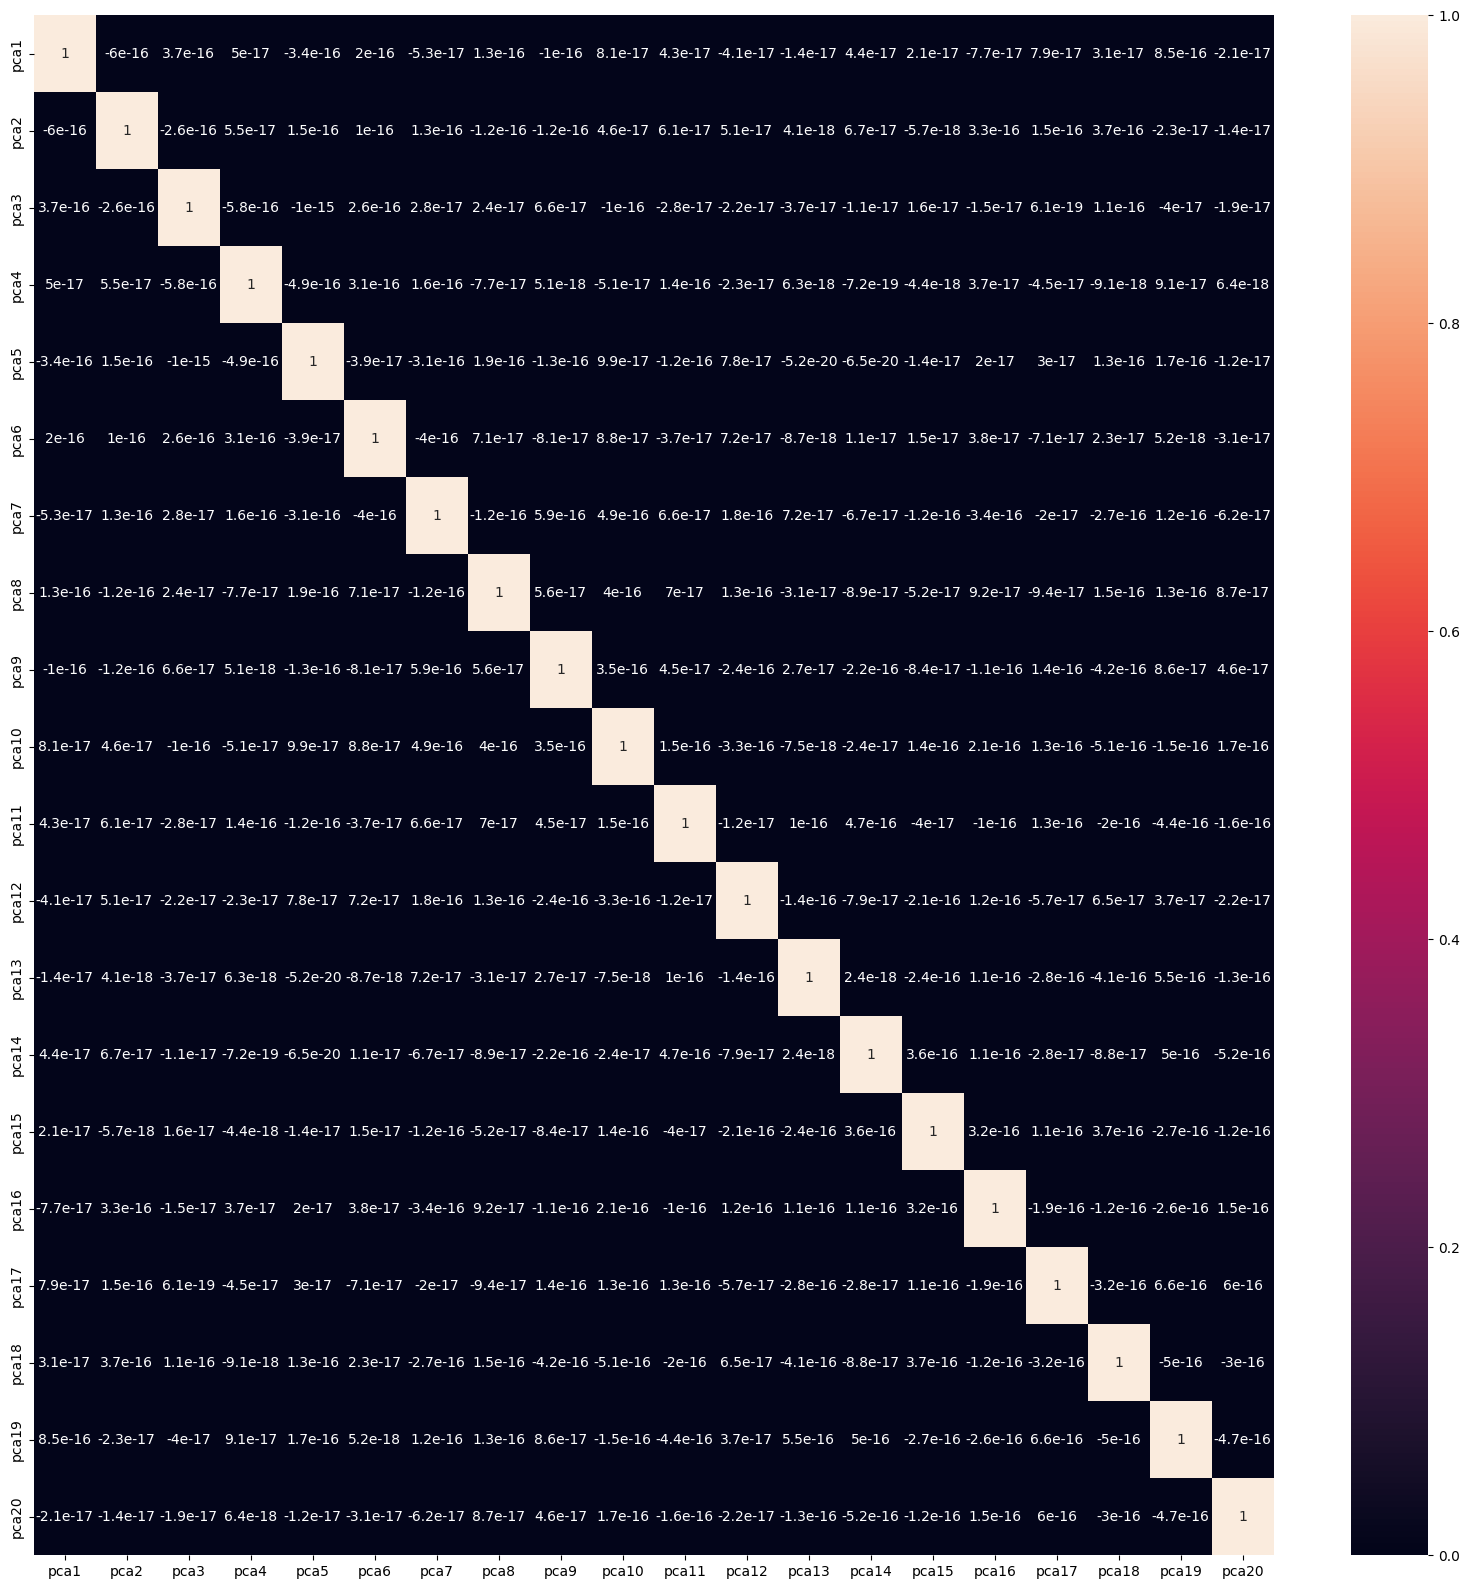

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(principle_df.corr(),annot=True)

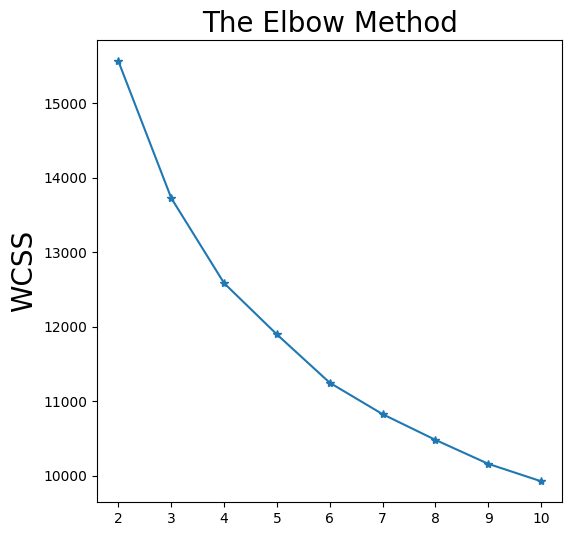

In [ ]:
kmeans = KMeans() # Object creation
wcss = [] # Create empty list

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans = kmeans.fit(principle_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
# plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [ ]:
for k in range(2,20):
  
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(principle_df)

  # Retrieve cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the silhouette score
  silhouette_avg = silhouette_score(principle_df, labels)

  # Print the silhouette score
  print(f"The silhouette score {k} is:", silhouette_avg)

The silhouette score 2 is: 0.1484759811725195
The silhouette score 3 is: 0.15828988249549455
The silhouette score 4 is: 0.13707064925286092
The silhouette score 5 is: 0.1285417248991583
The silhouette score 6 is: 0.13646336474324902
The silhouette score 7 is: 0.12329133061810284
The silhouette score 8 is: 0.12650514235382443
The silhouette score 9 is: 0.1220904433337436
The silhouette score 10 is: 0.11705081825136393
The silhouette score 11 is: 0.1240392094888259
The silhouette score 12 is: 0.11213973814277516
The silhouette score 13 is: 0.11423936508717857
The silhouette score 14 is: 0.11422046717484748
The silhouette score 15 is: 0.10722463198615119
The silhouette score 16 is: 0.1045668257834974
The silhouette score 17 is: 0.10561724222242781
The silhouette score 18 is: 0.10376667817992685
The silhouette score 19 is: 0.10629131702032847


---
* after checking the elbow technique and silhouette score for differnt number of clusters , the silhouette score is similar for all clusters

  so based on 
  
  Occam's Razor: In situations where you have similar silhouette scores for different numbers of clusters, it is often recommended to select the simplest or most parsimonious solution. Occam's Razor suggests that, all else being equal, the simplest explanation or solution is usually the best. Choosing a lower number of clusters can result in a more straightforward and interpretable model.
  
  
  
* based on Occam's Razor method simplest and lowest one is 2 cluster so we selecting the cluster value as 2
---

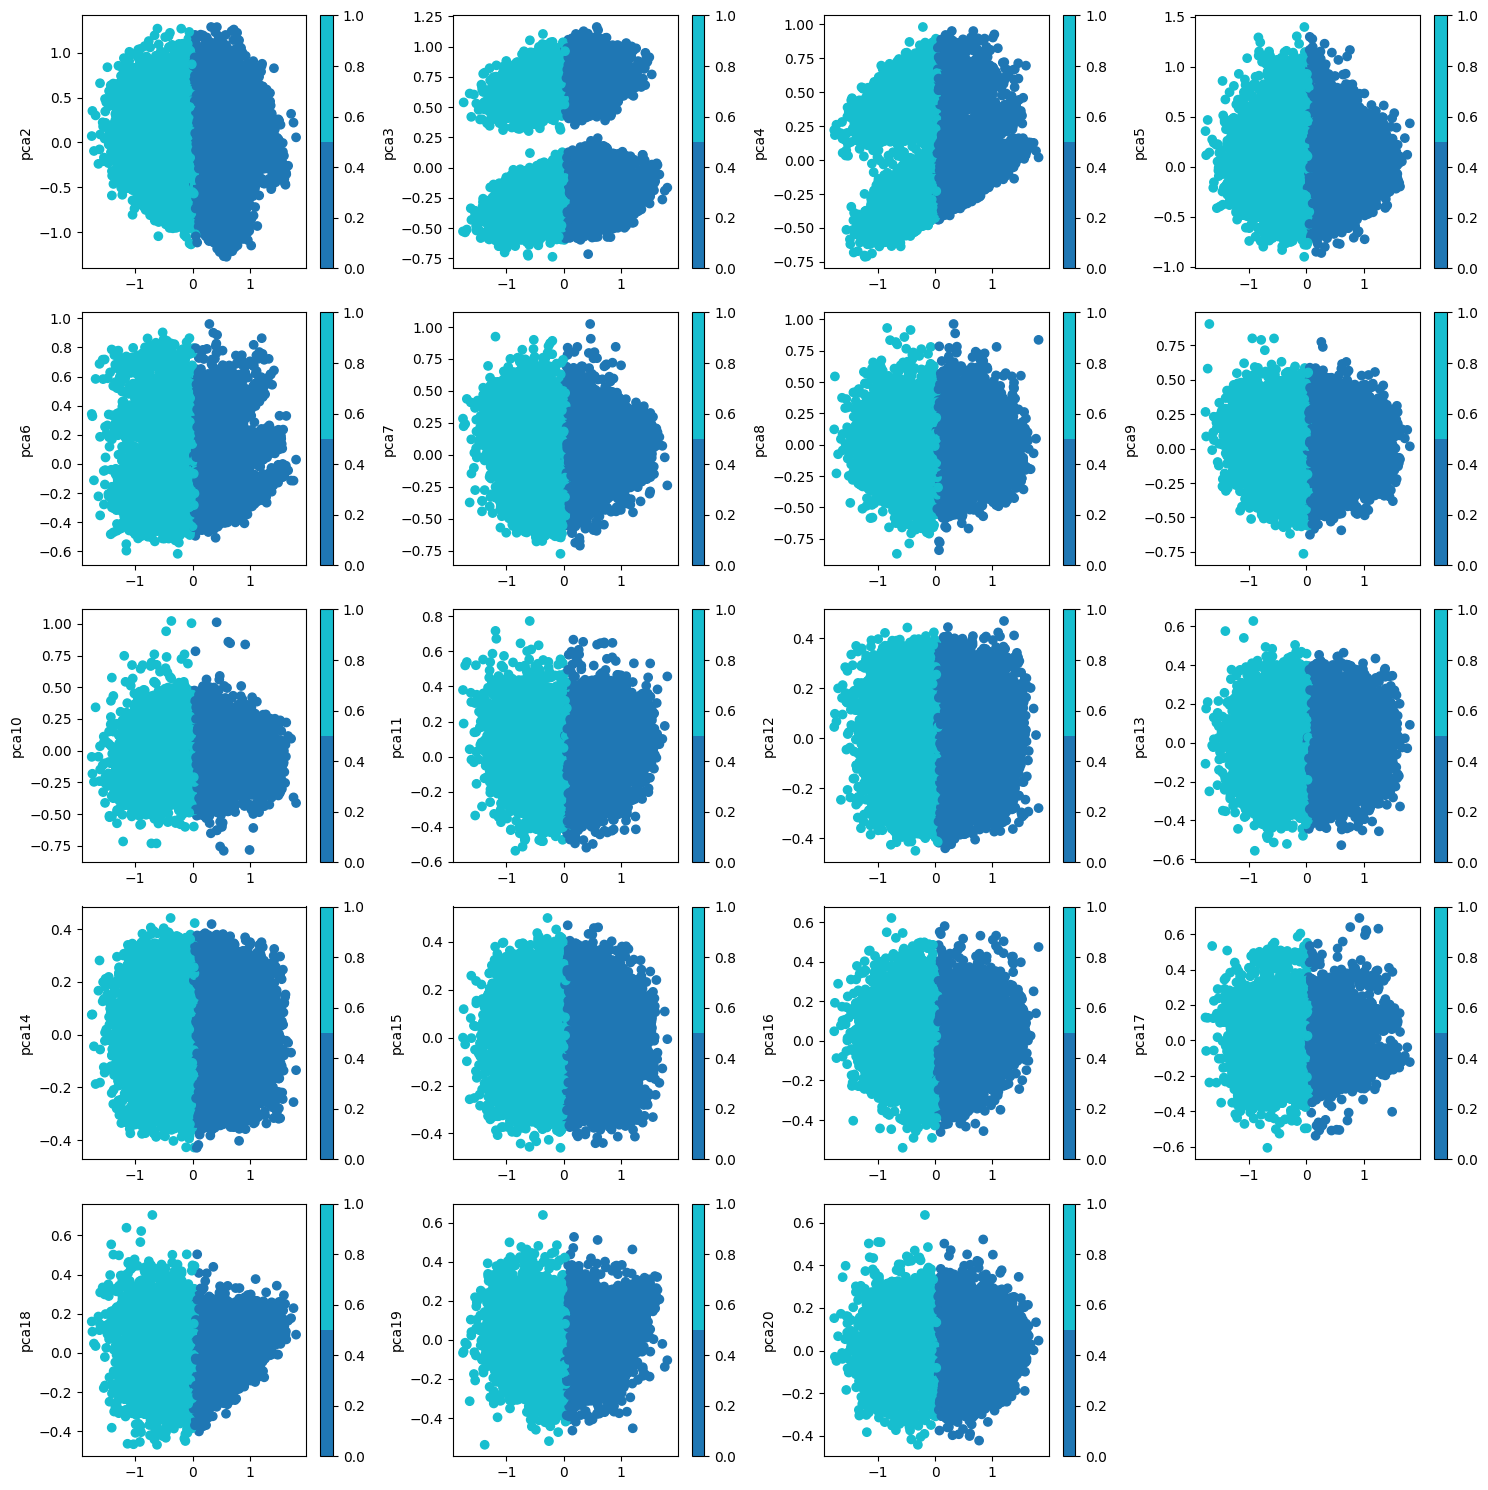

In [ ]:
final_k=2
kmeans = KMeans(n_clusters=final_k, random_state=0)
kmeans.fit(principle_df)

# Retrieve cluster labels for each data point
labels1 = kmeans.labels_


pl_no=1
plt.figure(figsize=(15,15))
for i in principle_df.columns[1:]:
  plt.subplot(5,4,pl_no)
  color_map = plt.cm.get_cmap('tab10', final_k)  # Change 'tab10' to any other colormap you prefer
  # Plot the data points with different colors based on the cluster labels
  plt.scatter(principle_df['pca1'],principle_df[i], c=labels1, cmap=color_map)
  # Add color legend
  plt.colorbar()
  pl_no+=1
  # plt.xlabel('pca1')
  plt.ylabel(i)
plt.tight_layout()

# conclussion


Task 1:-Prepare a complete data analysis report on the given data.
        
        DONE UNIVARIANT AND BIVARIANT ANALYSIS AND GIVEN THE INSIGHTS AS PER THE VISUALIZATIONS

Task 2:- Explore football skills and cluster football players based on their attributes.

       PCA DONE AND CLUSTERING DONE BASED ON IT

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:
    ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
      
      SAME AS BEEN SHOWN IN INSIGHT 2
     
   ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
      
      SAME BEEN SHOWN IN INSIGHT 3
      
   ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 
   
      INSIGHT 5 INDICATING THE CONCLUSSION FOR THE SAME